Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 74ms/step - accuracy: 0.1933 - loss: 3.0253 - val_accuracy: 0.7952 - val_loss: 0.7330
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 69ms/step - accuracy: 0.7239 - loss: 0.9632 - val_accuracy: 0.8748 - val_loss: 0.3941
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - accuracy: 0.8233 - loss: 0.5339 - val_accuracy: 0.9225 - val_loss: 0.2394
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 70ms/step - accuracy: 0.8782 - loss: 0.3550 - val_accuracy: 0.9185 - val_loss: 0.2096
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - accuracy: 0.9014 - loss: 0.2745 - val_accuracy: 0.9503 - val_loss: 0.1319
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 73ms/step - accuracy: 0.9179 - loss: 0.2146 - val_accuracy: 0.9404 - val_loss: 0.1558
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 70ms/step - accuracy: 0.9343 - loss: 0.2035 - val_accuracy: 0.9523 - val_loss: 0.1475
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 69ms/step - accuracy: 0.9384 - loss: 0.1743 - val_accuracy: 0.9563 - v

Model saved as sign_language_model.h5


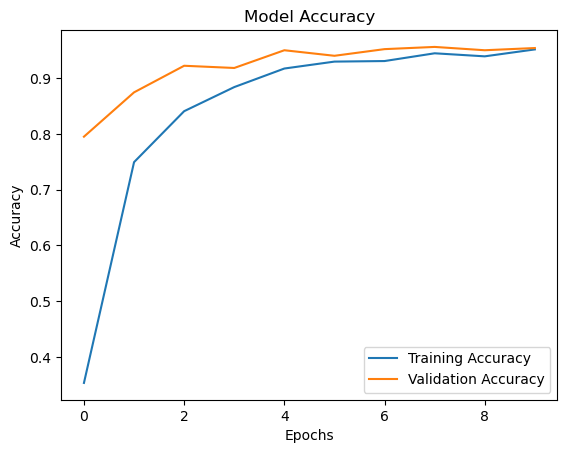

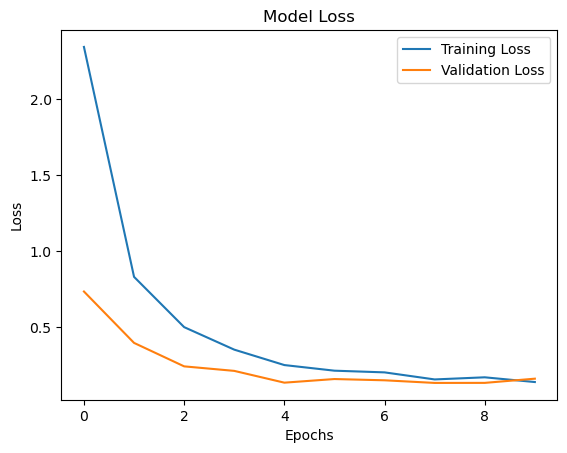

In [4]:
import os
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt

# Step 1: Load and preprocess the dataset
def load_data(data_dir):
    data = []
    labels = []
    
    # Get the list of subdirectories in the data directory
    class_names = sorted(os.listdir(data_dir))
    classes = len(class_names)
    
    # Loop over the class directories (numeric and alphabetic)
    for i, class_name in enumerate(class_names):
        path = os.path.join(data_dir, class_name)
        
        # Check if the directory exists before proceeding
        if not os.path.isdir(path):
            continue
        
        images = os.listdir(path)
        for img in images:
            try:
                image = Image.open(os.path.join(path, img))
                image = image.resize((64, 64))  # Resize to 64x64 pixels
                data.append(np.array(image))
                labels.append(i)  # Use the index as the class label
            except Exception as e:
                print(f"Error loading image {img}: {e}")

    data = np.array(data) / 255.0  # Normalize pixel values
    labels = np.array(labels)
    return data, labels

# Step 2: Create the CNN model
def create_model(input_shape, num_classes):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPool2D(pool_size=(2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPool2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    return model

# Step 3: Main function to train the model
def main():
    data_dir = 'asl_dataset'  # Update this to your dataset path
    images, labels = load_data(data_dir)

    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

    # Convert labels to one-hot encoding
    y_train = to_categorical(y_train, num_classes=len(np.unique(labels)))
    y_test = to_categorical(y_test, num_classes=len(np.unique(labels)))

    # Create and compile the model
    model = create_model((64, 64, 3), len(np.unique(labels)))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    # Train the model
    history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

    # Save the model to an .h5 file
    model_file = 'sign_language_model.h5'  # Specify file path and name
    model.save(model_file)
    print(f"Model saved as {model_file}")

    # Plot training history
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

if __name__ == "__main__":
    main()
